## Python Libraries - Pandas - Grouping and Pivoting

### Grouping

Grouping and aggregation are some of the most frequently used operations in data analysis, especially while performing exploratory data analysis (EDA), where comparing summary statistics across groups of data is common.

Grouping analysis can be thought of as having three parts, namely:
-  Splitting the data into groups (e.g., groups of customer segments, product categories, etc.)
-  Applying a function to each group (e.g., the mean or total sales of each customer segment)
-  Combining the results into a data structure showing summary statistics


In [7]:
# Loading libraries and file - sales.xlsx - with Market and Region as index
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sales=pd.read_excel(r"C:\Users\moury\Downloads\sales.xlsx",index_col=1)
sales.reset_index(inplace=True)
sales.set_index(["Market","Region"],inplace=True)


In [8]:
# Checking the 'sales' dataframe 
sales

No_of_Orders    Profit      Sales
Market       Region                                              
Africa       Western Africa              251 -12901.51   78476.06
             Southern Africa              85  11768.58   51319.50
             North Africa                182  21643.08   86698.89
             Eastern Africa              110   8013.04   44182.60
             Central Africa              103  15606.30   61689.99
Asia Pacific Western Asia                382 -16766.90  124312.24
             Southern Asia               469  67998.76  351806.60
             Southeastern Asia           533  20948.84  329751.38
             Oceania                     646  54734.02  408002.98
             Eastern Asia                414  72805.10  315390.77
             Central Asia                 37  -2649.76    8190.74
Europe       Western Europe              964  82091.27  656637.14
             Southern Europe             338  18911.49  215703.93
             Northern Europe             367  43237.44  252969.09
             Eastern Europe              241  25050.69  108258.93
LATAM        South America               496  12377.59  210710.49
             Central America             930  74679.54  461670.28
             Caribbean                   288  13529.59  116333.05
USCA         Western US                  490  44303.65  251991.83
             Southern US                 255  19991.83  148771.91
             Eastern US                  443  47462.04  264973.98
             Central US                  356  33697.43  170416.31
             Canada                       49   7246.62   26298.81

In [12]:
sales[["No_of_Orders"]].groupby("Market")

In [10]:
# Grouping the sales dataframe for the sum of the column 'No_of_Orders'
sales[["No_of_Orders"]].groupby("Market").sum()


,No_of_Orders
Market,
Africa,731
Asia Pacific,2481
Europe,1910
LATAM,1714
USCA,1593


In [11]:
# Grouping the sales dataframe over the index 'Market' for the sum of the columns 'No_of_Orders' and 'Sales'
sales[["No_of_Orders","Sales"]].groupby("Market").sum()

,No_of_Orders,Sales
Market,,
Africa,731,322367.04
Asia Pacific,2481,1537454.71
Europe,1910,1233569.09
LATAM,1714,788713.82
USCA,1593,862452.84


In [13]:
# Grouping the sales dataframe over the index 'Market' for the maximum value in the column 'No_of_Orders'
sales[["No_of_Orders"]].groupby("Market").max()

,No_of_Orders
Market,
Africa,251
Asia Pacific,646
Europe,964
LATAM,930
USCA,490


In [14]:
# Creating a dataframe 'df' with the mean of column 'Profit' for each market
sales[["Profit"]].groupby("Market").mean()

,Profit
Market,
Africa,8825.898000
Asia Pacific,32845.010000
Europe,42322.722500
LATAM,33528.906667
USCA,30540.314000


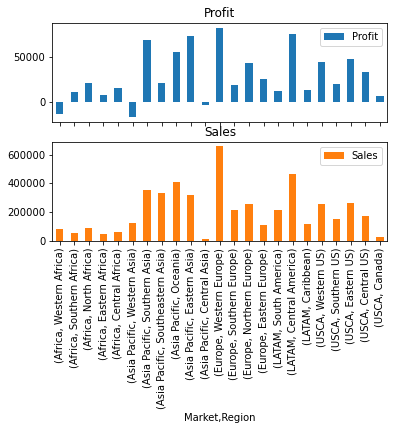

In [16]:
# Plotting a bar graph over 'df'
sales[["Profit","Sales"]].plot(kind="bar",subplots=True)
plt.show()
##Did this on my own. so not sure if it is correct.

### Pivoting

You may want to use pandas pivot tables as an alternative to ```groupby()```. They provide Excel-like functionalities to create aggregate tables. 

In [17]:
# Read the help documentation for pivot_table
help(pd.DataFrame.pivot_table)

Help on function pivot_table in module pandas.core.frame:

pivot_table(self, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True) -> 'DataFrame'
    Create a spreadsheet-style pivot table as a DataFrame.
    
    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The

In [18]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Create a new dataframe
users= pd.DataFrame({"weekday" : ['Sun', 'Sun', 'Mon', 'Mon'],
                    "city": ['Austin', 'Dallas', 'Austin', 'Dallas'],
                    "visitors":[139, 237, 326, 456],
                    "signups" : [7, 12, 3, 5]})

In [21]:
# Set the index of the dataframe as 'weekday'
users.set_index("weekday",inplace=True)
users

,city,visitors,signups
weekday,,,
Sun,Austin,139,7
Sun,Dallas,237,12
Mon,Austin,326,3
Mon,Dallas,456,5


<AxesSubplot:xlabel='weekday'>

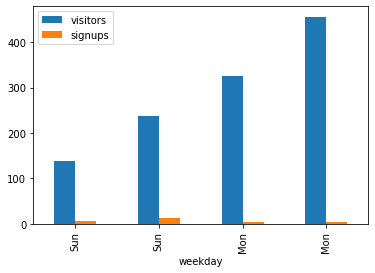

In [23]:
# plot a bar graph over the dataframe 'users'
users.plot(kind="bar")

In [27]:
# Create a pivot table with the columns as 'city' summarising the variable 'visitors'
visitors_pivot=users.pivot(columns="city",values="visitors")

In [28]:
# Check the created pivot table
visitors_pivot

city,Austin,Dallas
weekday,,
Mon,326,456
Sun,139,237


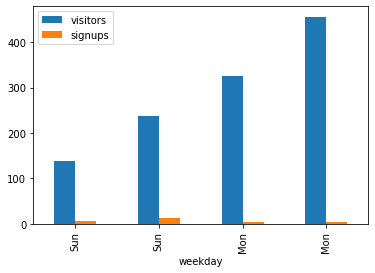

In [29]:
# Draw a bar graph over the created pivot
users.plot(kind="bar")
plt.show()

In [30]:
# Create a pivot table with the columns as 'city' summarising all the variables
visitors_signups=users.pivot(columns="city")

In [31]:
# Check the created pivot table
visitors_signups

visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12

<AxesSubplot:xlabel='weekday'>

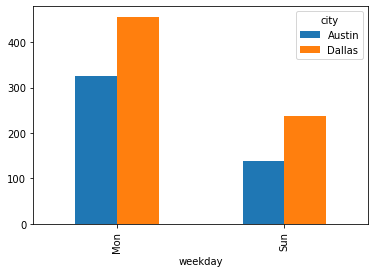

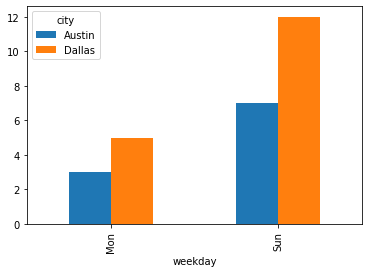

In [32]:
# Draw a bar graph over the created pivot for each variable
visitors_signups["visitors"].plot(kind="bar")
visitors_signups["signups"].plot(kind="bar")